In [11]:
ReloadProject('deep_learning')

notebook_init.py imported and reloaded
forwarded symbol: A
forwarded symbol: Activation
forwarded symbol: Dense
forwarded symbol: InputLayer
forwarded symbol: Model
forwarded symbol: Sequential
forwarded symbol: T
reloaded: circular_world_env
forwarded symbol: circular_world_env
reloaded: environment_impl
forwarded symbol: environment_impl
reloaded: guided_environments
forwarded symbol: guided_environments
reloaded: gym
forwarded symbol: gym
reloaded: keras
forwarded symbol: keras
reloaded: layers
forwarded symbol: layers
reloaded: logging
forwarded symbol: logging
reloaded: model_builder
forwarded symbol: model_builder
reloaded: models
forwarded symbol: models
reloaded: numpy
forwarded symbol: numpy
reloaded: numpy_util
forwarded symbol: numpy_util
reloaded: optimizers
forwarded symbol: optimizers
reloaded: policy_impl
forwarded symbol: policy_impl
reloaded: q_base
forwarded symbol: q_base
reloaded: qfunc_impl
forwarded symbol: qfunc_impl
reloaded: runner_impl
forwarded symbol: runner

# Models

## (64,)

In [12]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('MountainCar-v0'))
qfunc = qfunc_impl.DQN(
    model=qfunc_impl.CreateModel(
        state_shape=env.GetStateShape(),
        action_space_size=env.GetActionSpaceSize(),
        hidden_layer_sizes=(64,)),
    training_batch_size=batch_size,
    discount_factor=0.99,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=100000, experience_sample_batch_size=batch_size)

In [7]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=1.0)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[13:29:27] q_base.py:415 Episode 0/500: episode_total_reward = -200.00, episode_steps=199
[14:03:29] q_base.py:417 Episode 100/500: episode_total_reward = -200.00, episode_steps=199
[14:37:15] q_base.py:417 Episode 200/500: episode_total_reward = -200.00, episode_steps=199
[15:11:13] q_base.py:417 Episode 300/500: episode_total_reward = -200.00, episode_steps=199
[15:45:13] q_base.py:417 Episode 400/500: episode_total_reward = -200.00, episode_steps=199
CPU times: user 2h 48min 42s, sys: 19.3 s, total: 2h 49min 1s
Wall time: 2h 49min 32s


In [8]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.3)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[16:19:00] q_base.py:415 Episode 0/500: episode_total_reward = -200.00, episode_steps=199
[16:52:07] q_base.py:417 Episode 100/500: episode_total_reward = -200.00, episode_steps=199
[17:25:50] q_base.py:417 Episode 200/500: episode_total_reward = -200.00, episode_steps=199
[17:59:26] q_base.py:417 Episode 300/500: episode_total_reward = -200.00, episode_steps=199
[18:32:00] q_base.py:417 Episode 400/500: episode_total_reward = -200.00, episode_steps=199
CPU times: user 2h 44min 38s, sys: 28.6 s, total: 2h 45min 7s
Wall time: 2h 45min 46s


In [9]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[19:04:46] q_base.py:415 Episode 0/500: episode_total_reward = -200.00, episode_steps=199
[19:37:37] q_base.py:417 Episode 100/500: episode_total_reward = -200.00, episode_steps=199
[20:10:12] q_base.py:417 Episode 200/500: episode_total_reward = -200.00, episode_steps=199
[20:42:37] q_base.py:417 Episode 300/500: episode_total_reward = -200.00, episode_steps=199
[21:15:00] q_base.py:417 Episode 400/500: episode_total_reward = -200.00, episode_steps=199
CPU times: user 2h 42min 29s, sys: 19.4 s, total: 2h 42min 48s
Wall time: 2h 43min 5s


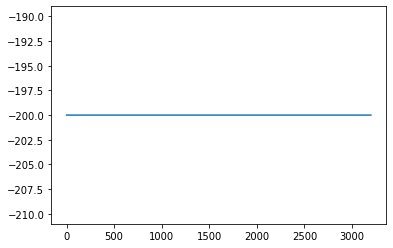

CPU times: user 33min 44s, sys: 6.29 s, total: 33min 50s
Wall time: 34min 1s


In [10]:
%%time
# Test
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicy()
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=100)